<a href="https://colab.research.google.com/github/analyst-rhie/data-collection-information/blob/main/%5B3%EA%B0%95%5D_NLP_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D_%EC%9D%B4%EC%88%98%EC%95%88%EC%BB%B4%ED%93%A8%ED%84%B0%EC%97%B0%EA%B5%AC%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 본 강의 노트는 이수안컴퓨터연구소를 필사한 내용임을 알려드립니다.

* https://www.youtube.com/watch?v=YJSHBQj8zbU&list=PL7ZVZgsnLwEEoHQAElEPg7l7T6nt25I3N&index=3

## 기본 개념 참고 
* https://wikidocs.net/22660

### 군집분석(Cluster Analysis)
* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

* 군집분석은 계층적인 방법(hierarchical clustering)과 비계층적인 방법(k-means)이 있는데, 순차적으로 그룹을 할당하는지의 여부에 따라 나뉩니다. 계층적인 방법은 가까운 대상끼리 순차적으로 군집을 묶어간다면, 비계층적인 방법은 랜덤하게 군집을 묶어가죠.

### 텍스트 유사도
* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Siilarity) : 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어수의 비율을 사용
* 코사인 유사도(Cosine Similarity) : 벡터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 벡터 표현으로 활용 가능

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:

def jaccard_similarity(d1,d2): #두개의 문서가 온다 하자
  lemmatizer = WordNetLemmatizer()
# 각 문서마다 포함이 되어있는 word들을 다 뽑은 다음에 
# 뽑은 것을 lematizer(표제어 화)해서 리스트로 가지고 있어야 한다. 이를 한번에:
  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]
  #d1과 d2와 공통된 부분과 전체를 계산해야 됨.
  #우선 공통된 부분을 계산해보자. 개수가 중요하므로 len을 준다.
  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union #전체 빈도에서 겹치는 부분을 나누어준다.

In [3]:
d1 = "Think like a man of action and act like man of thought."
d2 = "Try no to become a man of success but rather try to become a man of value."
d3 = "Give me liberty, of give me death."

print(jaccard_similarity(d1,d2))
print(jaccard_similarity(d1,d3))
print(jaccard_similarity(d2,d3))

0.2222222222222222
0.13333333333333333
0.11764705882352941


In [ ]:
tiv = TfidfVectorizer()
corpus=[d1,d2,d3]
tfidf = tiv.fit_transform(corpus).todense()
print(cosine_similarity(tfidf[0],tfidf[1]))
print(cosine_similarity(tfidf[0],tfidf[2]))
print(cosine_similarity(tfidf[1],tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


* 위의 자카드를 직접 계산한것과 비슷함.

### 한국어 형태소 분석기 설치

In [17]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 75.0 MB/s 
     |████████████████████████████████| 86 kB 7.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
!sudo apt-get install curl git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.15).
git is already the newest version (1:2.17.1-1ubuntu0.9).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [13]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 P

### 데이터 전처리
* 영화 리뷰 데이터 

In [14]:
import urllib.request

raw=urllib.request.urlopen("http://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt").readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [15]:
raw = [x.decode() for x in raw[1:10000]]
reviews = []
for i in raw :
  reviews.append(i.split('\t')[1])
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [18]:
from konlpy.tag import Mecab
tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews] # 한글 형태소 분석
# 토큰화된 결과를 가져옴
print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

### Word2Vec 생성
* word2vec 생성에 필요한 라이브러리들을 추가
  * Word2Vec : 단어 간 유사도를 반영할 수 있도록 단어의 의미를 벡터화 할 수 있는 방법

In [4]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* Word2Vec 모델을 생성
* gensim의 Word2Vec은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [19]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [20]:
word2vec.most_similar('영화') #영화에 대해 유사한 단어들을 볼 수 있음
# vectorize되어있어 계산이 가능하다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('마음', 0.9619324207305908),
 ('듯', 0.955453634262085),
 ('현실', 0.9509298801422119),
 ('작품', 0.9493203163146973),
 ('이야기', 0.9486488103866577),
 ('연애', 0.9422402381896973),
 ('모습', 0.9422250390052795),
 ('증명', 0.9398845434188843),
 ('에게', 0.9388347268104553),
 ('우리', 0.936511754989624)]

In [21]:
tsne=TSNE(n_components=2)
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [22]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-3.36575389e-01,  1.42512649e-01,  7.04011768e-02, ...,
        -1.31569937e-01, -8.45888257e-03, -3.55662555e-01],
       [-9.22907948e-01,  3.34003150e-01,  4.63759974e-02, ...,
        -8.37010071e-02,  1.55721813e-01, -6.06520772e-01],
       [-1.14308691e+00, -3.55517298e-01, -1.47593185e-01, ...,
        -3.06561571e-02,  3.36629480e-01, -7.18326867e-01],
       ...,
       [-4.75518554e-02,  1.41218435e-02,  7.49363471e-03, ...,
        -1.23061286e-02, -8.75819649e-04, -4.85964119e-02],
       [-4.09113541e-02,  1.75416339e-02,  5.38643543e-03, ...,
        -1.62275345e-03, -8.78278352e-03, -3.28622572e-02],
       [-7.08074346e-02,  1.74440462e-02,  4.67724819e-03, ...,
        -1.50947282e-02, -7.60059105e-03, -5.31428270e-02]], dtype=float32)

In [23]:
import pandas as pd
#2차원으로 바꾸기
transform_similarity = tsne.fit_transform(similarity) #전체 similarity를 2차원으로
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x','y'])
df[0:10]

,x,y
어릴,0.103771,-32.597000
때,47.610058,-23.061459
보,51.028641,-25.777323
고,50.469486,-26.895578
지금,48.798145,-26.196232
다시,50.167221,-26.379574
봐도,45.014748,-35.348999
재밌,45.557224,-38.714420
어요,44.000572,-38.850231
ㅋㅋ,42.998955,-40.826046


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


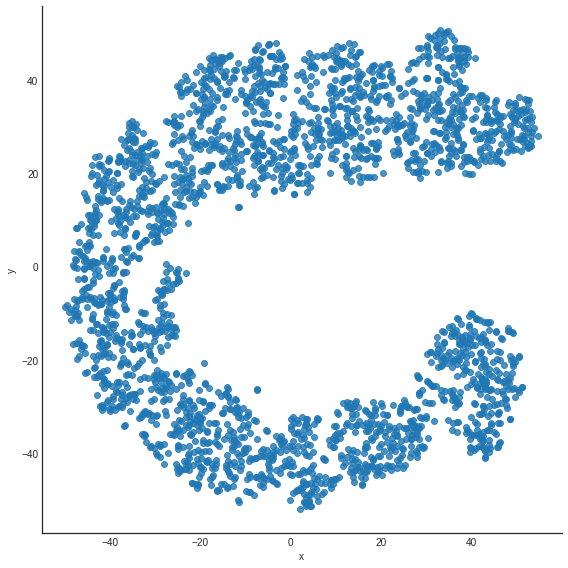

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
sns.lmplot('x','y',data=df, fit_reg=False, size=8)
plt.show()

### Scikit-learn, Scipy를 이용한 계층적 군집화
* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼

### Scikit-learn
* 비계층적 군집화의 일종인 agglomerativeClusting(병합 군집)을 이용, 계층적 군집화 실습
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  * 1. ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  * 2. average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  * 3. complete - 클러스터간 초대 거리가 가장 짧은 두 클러스터를 합침.
  * 보통 ward방법이 제일 효과적

  * scikit-learn 사용 예제에서는 종료조건간의 차이를 비교

### 비계층적 군집분석

In [25]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=6, linkage = 'ward')
# 클러스터 수 지정 가능
predict = ward.fit_predict(df)
predict

array([2, 3, 3, ..., 4, 4, 4])

In [26]:
result = df
result['predict'] = predict # 어느 클러스터에 저장됬는지 보여줌
result[0:10]

,x,y,predict
어릴,0.103771,-32.597000,2
때,47.610058,-23.061459,3
보,51.028641,-25.777323,3
고,50.469486,-26.895578,3
지금,48.798145,-26.196232,3
다시,50.167221,-26.379574,3
봐도,45.014748,-35.348999,3
재밌,45.557224,-38.714420,3
어요,44.000572,-38.850231,3
ㅋㅋ,42.998955,-40.826046,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


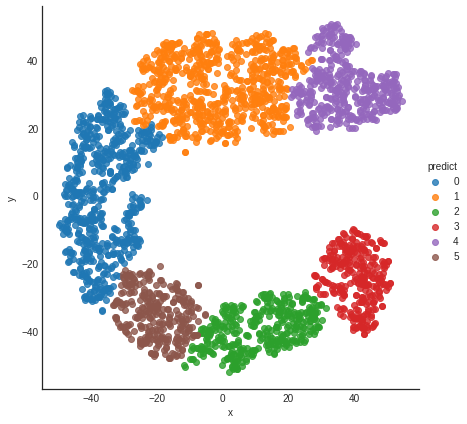

In [28]:
sns.lmplot('x','y',data=result,fit_reg=False, size=6, hue="predict")
# hue는 색갈 부분을 카테고리화 하는 부분


### average

In [32]:
avg = AgglomerativeClustering(n_clusters=6, linkage="average")
predict=avg.fit_predict(df)
predict

array([2, 5, 5, ..., 3, 3, 3])

In [33]:
results = df
result['predict'] = predict
result[0:10]

,x,y,predict
어릴,0.103771,-32.597000,2
때,47.610058,-23.061459,5
보,51.028641,-25.777323,5
고,50.469486,-26.895578,5
지금,48.798145,-26.196232,5
다시,50.167221,-26.379574,5
봐도,45.014748,-35.348999,5
재밌,45.557224,-38.714420,5
어요,44.000572,-38.850231,5
ㅋㅋ,42.998955,-40.826046,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


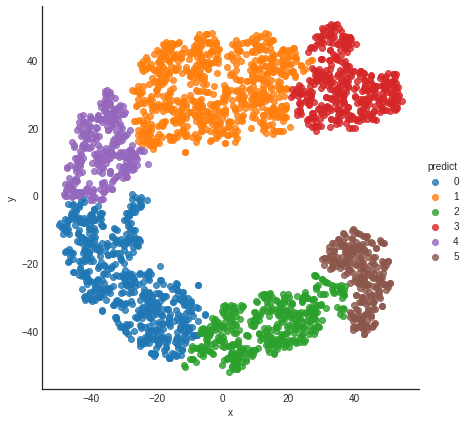

In [34]:
sns.lmplot('x','y',data=results, fit_reg=False, size=6, hue="predict")

### complete

In [37]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([5, 3, 3, ..., 4, 4, 4])

In [38]:
results=df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,0.103771,-32.597000,5
때,47.610058,-23.061459,3
보,51.028641,-25.777323,3
고,50.469486,-26.895578,3
지금,48.798145,-26.196232,3
다시,50.167221,-26.379574,3
봐도,45.014748,-35.348999,3
재밌,45.557224,-38.714420,3
어요,44.000572,-38.850231,3
ㅋㅋ,42.998955,-40.826046,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


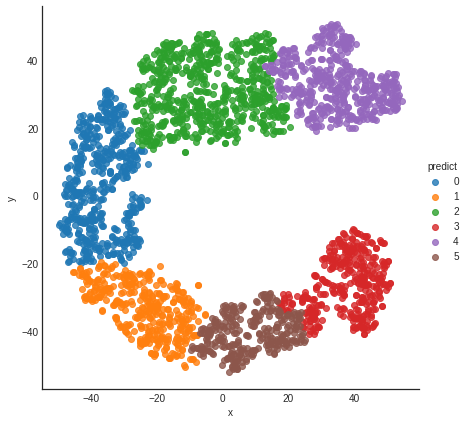

In [39]:
sns.lmplot('x','y', data=results, fit_reg=False, size=6, hue='predict')

### 계층적 군집분석
* 군집 수를 사전에 정의하지 않고, 학습 이후 군집수를 선택한다.

### Scipy
* scipy를 이용한 거리 사용과 word2vec 사용을 비교
* pdist를 이용한 각 단어간 유클리디안 거리 계산

In [43]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
distmatrix = pdist(df, metric='euclidean') #word2vec 데이터 그대로 사용, 유클리디안 거리 계산 사용
row_dist = pd.DataFrame(squareform(distmatrix))


In [44]:
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,48.495091,51.418386,50.726832,49.153962,50.487676,45.039642,45.906854,44.385044,43.723152,48.622158,40.187019,48.156046,55.198005,42.760868,44.990950,57.146263,40.662652,46.203106,46.096643,46.159456,68.625254,41.967287,45.818685,50.789790,45.539187,39.913488,45.326702,41.556321,20.724131,43.119834,28.450139,43.949551,46.433860,57.810742,28.219331,44.124016,43.353322,37.888316,39.113067,...,76.997933,79.114280,75.626956,70.437281,86.206444,76.334628,74.548861,71.746549,55.171148,78.453016,61.203977,78.200232,79.546615,79.329200,64.660714,81.989468,60.886753,78.960222,84.328487,84.523403,74.336993,80.350265,80.453607,35.428038,68.506658,74.541976,80.720896,79.082564,71.109866,58.324506,61.595644,78.434661,66.608153,71.918413,65.739464,82.682947,77.127806,82.757616,78.885592,72.417089
1,48.495091,0.000000,4.366077,4.782970,3.352366,4.189149,12.558634,15.786999,16.196102,18.353279,11.723996,16.141237,11.632635,89.948353,14.627053,14.990171,72.262826,15.856079,13.655992,13.749995,10.037202,49.200176,89.513956,89.571283,3.711819,9.806241,87.406556,12.975109,10.391251,38.300589,10.856405,25.872715,13.099414,2.437948,68.818739,22.310853,13.340167,5.671378,10.801500,86.731146,...,62.155748,87.640443,75.592096,51.661770,59.008651,57.534743,83.573716,83.087738,61.723421,48.973306,69.616297,61.178896,64.880709,53.322592,67.463408,55.487625,56.319310,50.532716,66.960778,72.513783,50.247546,57.274962,62.398323,82.628015,81.802265,62.190116,58.972988,71.450423,86.109665,56.962501,81.248470,50.532755,92.307098,47.238034,67.449867,56.630038,58.583006,54.935294,49.843732,50.804750
2,51.418386,4.366077,0.000000,1.250260,2.269492,1.051071,11.304154,14.046526,14.842327,17.056961,15.541064,20.507142,15.520573,94.106875,18.953093,19.192983,76.625544,20.220052,17.769988,17.873224,14.202368,52.642892,92.753813,93.276478,6.347819,14.039674,90.652707,11.579485,11.050136,39.724785,15.211887,27.125037,17.388963,6.723613,73.162120,24.281310,17.616612,8.095385,14.403661,89.945906,...,65.673088,91.886580,79.670949,55.097808,61.528727,60.852838,87.843610,87.396912,66.041805,51.453350,73.927196,64.564353,68.369592,56.087021,71.679016,58.153246,60.422702,53.097934,70.233711,76.071105,53.272813,60.241950,65.689106,85.917730,86.138310,65.858289,62.025922,75.255128,90.454289,61.156528,85.613835,53.157904,96.648396,50.283320,71.638194,59.319238,61.901429,57.468390,52.354132,54.037109
3,50.726832,4.782970,1.250260,0.000000,1.811758,0.598018,10.060541,12.799037,13.592666,15.807175,16.319996,20.810424,16.270472,93.998919,19.390440,19.768106,76.936483,20.547371,18.407725,18.505145,14.802153,53.583413,92.149179,92.871532,7.306688,14.586882,90.050976,10.331479,10.012028,38.695581,15.587910,26.085884,17.879253,6.952082,73.547972,23.389093,18.122039,7.543828,14.083799,89.332866,...,66.593949,92.422363,80.344422,56.040998,62.663585,61.830335,88.352120,87.850713,66.480684,52.591181,74.378525,65.524277,69.299811,57.182100,72.245536,59.265290,61.078407,54.224035,71.224856,76.980708,54.317345,61.300404,66.674806,85.333728,86.541411,66.727895,63.066960,76.071978,90.836111,61.742395,85.864244,54.274923,96.791371,51.322606,72.229403,60.427773,62.879078,58.600414,53.487973,55.034720
4,49.153962,3.352366,2.269492,1.811758,0.000000,1.381297,9.903900,12.930917,13.532938,15.737283,15.072583,19.113017,14.984726,92.188247,17.780942,18.272846,75.222896,18.863768,16.979824,17.070734,13.351988,52.515793,90.507133,91.121037,6.505926,13.086535,88.406875,10.253479,8.964495,37.586714,13.946109,25.000892,16.315034,5.279054,71.875182,22.045201,16.569636,5.849227,12.294953,87.696821,...,65.485853,90.851344,78.901890,54.976699,62.046589,60.826881,86.760224,86.219421,64.842265,5

* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

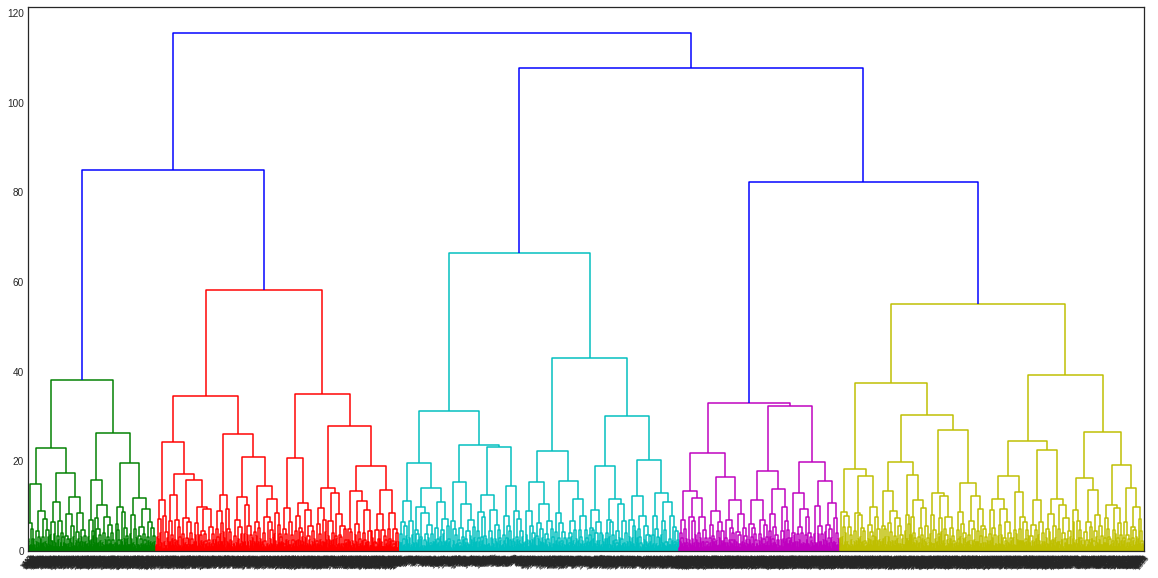

In [45]:
row_clusters = linkage(distmatrix, method='complete')
plt.figure(figsize=(20,10))
dendrogram(row_clusters,
           leaf_rotation = 50, #x축을 50도로 로테이션
           leaf_font_size = 7)
plt.show() #계층을 만들어 시각화하여 시간이 걸림

* word2vec을 이용한 군집분석 및 덴드로그램 시각화

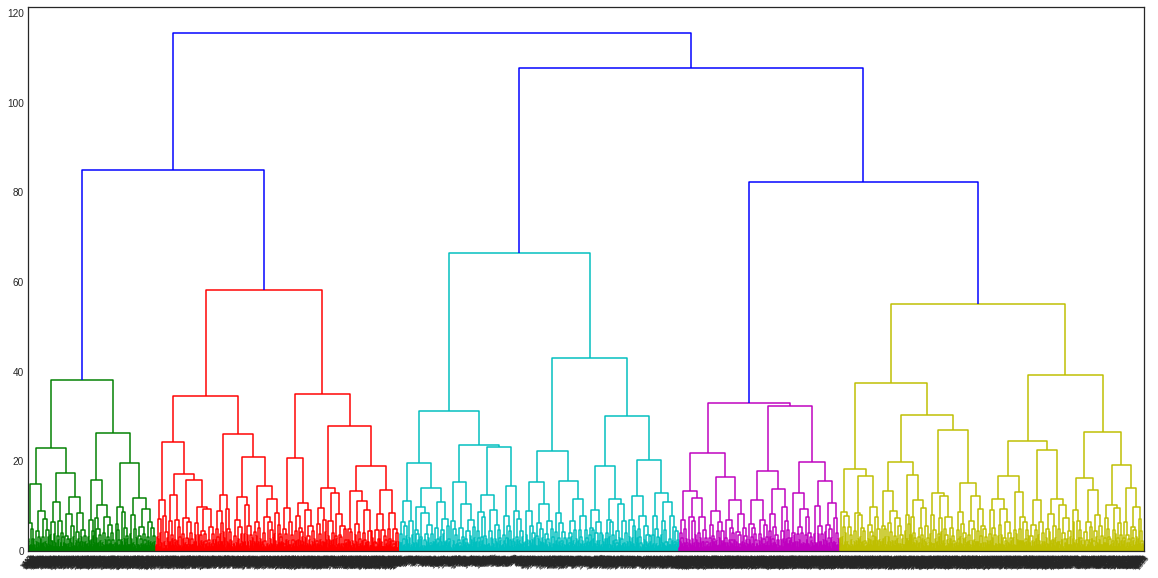

In [46]:
mergins = linkage(df, method='complete')
plt.figure(figsize=(20,10))
dendrogram(mergins,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

### Scikit-learn을 이용한 비계층적 군집화
* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요
* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

* 비계층적 군집화의 장점
  - 주어진 데이터의 내부구조에 대한 사전정보 없이 의미있는 자료구조를 찾을 수 있다.
  - 다양한 형태의 데이터에 적용이 가능하다.
  - 분석방법 적용이 용이하다.

* 비계층적 군집화의 단점
  - 가중치와 거리정의가 어렵다.
  - 초기 군집수를 결정하기 어렵다. 
  - 사전에 주어진 목적이 없으므로 결과 해석이 어렵다.

### 클러스터 개수 3

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
predict=kmeans.fit_predict(df)
predict

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [48]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,0.103771,-32.597000,1
때,47.610058,-23.061459,1
보,51.028641,-25.777323,1
고,50.469486,-26.895578,1
지금,48.798145,-26.196232,1
다시,50.167221,-26.379574,1
봐도,45.014748,-35.348999,1
재밌,45.557224,-38.714420,1
어요,44.000572,-38.850231,1
ㅋㅋ,42.998955,-40.826046,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


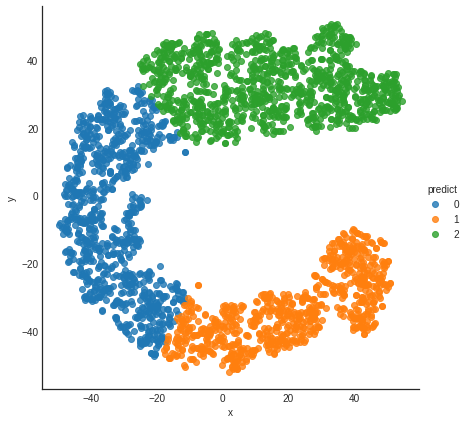

In [49]:
sns.lmplot('x','y',data=results, fit_reg=False, size=6, hue='predict')

In [50]:
kmeans = KMeans(n_clusters=6)
predict= kmeans.fit_predict(df)
predict


array([1, 3, 3, ..., 0, 0, 0], dtype=int32)

In [51]:
results = df
results["predict"] = predict
results[1:10]

,x,y,predict
때,47.610058,-23.061459,3
보,51.028641,-25.777323,3
고,50.469486,-26.895578,3
지금,48.798145,-26.196232,3
다시,50.167221,-26.379574,3
봐도,45.014748,-35.348999,3
재밌,45.557224,-38.714420,3
어요,44.000572,-38.850231,3
ㅋㅋ,42.998955,-40.826046,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


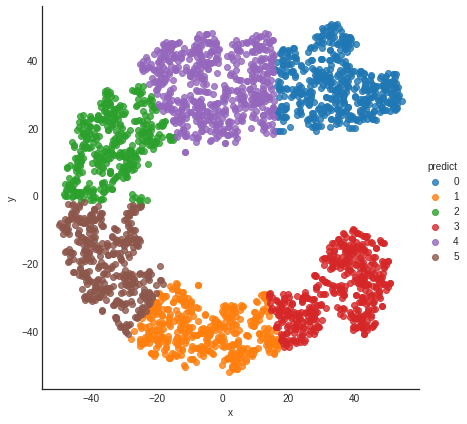

In [52]:
sns.lmplot('x','y',data=results, fit_reg=False,size=6, hue='predict')